<h1>The Battle of Neighborhoods (Week 2)

<h3> Importing libraries

In [88]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [137]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests
!pip install geocoder
!pip install pgeocode
import geocoder
import pgeocode

     |████████████████████████████████| 112kB 31.7MB/s eta 0:00:01
     |████████████████████████████████| 102kB 16.7MB/s ta 0:00:01
     |████████████████████████████████| 829kB 28.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 16.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


<h2>Downloading dataset for neigbouhoods in Torornto

In [138]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
#print(soup)
table = soup.find('table',{'class':'wikitable sortable'}).tbody
rows = table.find_all('tr')
columns = [v.text.replace('\n','') for v in rows[0].find_all('th')]
df_toronto = pd.DataFrame(columns=columns)
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    values = [tds[0].text, tds[1].text, tds[2].text.replace('\n','')]
    i=i+1
    df_toronto = df_toronto.append(pd.Series(values, index=columns),ignore_index=True)
   
df_toronto.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [139]:
df_toronto.drop(df_toronto[df_toronto['Borough']=='Not assigned'].index, axis=0, inplace=True)


df_toronto1= df_toronto[['Postcode', 'Borough', 'Neighbourhood']].drop_duplicates()\
                         .groupby(['Postcode','Borough'])['Neighbourhood']\
                         .apply(list)\
                         .reset_index()


df_toronto1['Neighbourhood'] = df_toronto1.apply(lambda x: (','.join([str(s) for s in x['Neighbourhood']])), axis = 1)
for row in range(len(df_toronto1)):
    if df_toronto1.iloc[row]['Neighbourhood'] == 'Not assigned':
       df_toronto1.at[row, 'Neighbourhood']  = df_toronto1.iloc[row, 1]
        


df_toronto1.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [140]:
import pgeocode
def get_coordinate(postal_code, country):
    """
    Return coordinate of given localisation

    Parameters:
    postal_code : Searched postal code
    country : Country of the postal code
    
    Return:
    latitude, longitude (tuple) : Coordinates of given localisation
    """
    nomi = pgeocode.Nominatim(country)
    res = nomi.query_postal_code(postal_code)
    return res.latitude, res.longitude

In [141]:
list_latitudes = list()
list_longitudes = list()

for row in range(len(df_toronto1)):
    latitude, longitude = get_coordinate(df_toronto1.iloc[row, 0], 'CA')
    list_latitudes.append(latitude)
    list_longitudes.append(longitude)
df_toronto1["Latitude"] = list_latitudes
df_toronto1["Longitude"] = list_longitudes

In [142]:
df_toronto1.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.8113,-79.1930
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.7878,-79.1564
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.7678,-79.1866
3,M1G,Scarborough,Woburn,43.7712,-79.2144
4,M1H,Scarborough,Cedarbrae,43.7686,-79.2389


In [143]:
df_toronto1=df_toronto1.drop(86)

In [144]:
df_toronto1

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.8113,-79.1930
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.7878,-79.1564
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.7678,-79.1866
3,M1G,Scarborough,Woburn,43.7712,-79.2144
4,M1H,Scarborough,Cedarbrae,43.7686,-79.2389
5,M1J,Scarborough,Scarborough Village,43.7464,-79.2323
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.7298,-79.2639
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.7122,-79.2843
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.7247,-79.2312
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.6952,-79.2646


<h2>Locating the neighbouhoods on the map

In [145]:
map_toronto = folium.Map(location=[43.656, -79.391], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto1['Latitude'], df_toronto1['Longitude'], df_toronto1['Borough'], df_toronto1['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h2>Downloading dataset for neighbourhoods in NYC

In [146]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [147]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [148]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [149]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [150]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


<h2>Locationg neighbouhoods on a map

In [151]:
# create map of New York using latitude and longitude values
latitude =  40.7128
longitude = -74.0060
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

<h2>Using Foursquare API to explore the cities to find hospitals and schools

In [89]:
CLIENT_ID = 'FBWAT5WSQA4BSVPALBGIQRB3E3VYVNAPYNNL2K0LSZF21TAZ' # your Foursquare ID
CLIENT_SECRET = '0QJ3LB1AA5P5WH5BFS3DNHLHKG5JO2J11SWVAL1JHQQE0QTN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FBWAT5WSQA4BSVPALBGIQRB3E3VYVNAPYNNL2K0LSZF21TAZ
CLIENT_SECRET:0QJ3LB1AA5P5WH5BFS3DNHLHKG5JO2J11SWVAL1JHQQE0QTN


<h3> Finding schools in Toronto

In [152]:
trt_latitude = 43.6532
trt_longitude = -79.3832
#nyc_latitude =  40.7128
#nyc_longitude = -74.0060
query = 'school'
radius = 6000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    trt_latitude, 
    trt_longitude,   
    query,
    radius)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=FBWAT5WSQA4BSVPALBGIQRB3E3VYVNAPYNNL2K0LSZF21TAZ&client_secret=0QJ3LB1AA5P5WH5BFS3DNHLHKG5JO2J11SWVAL1JHQQE0QTN&v=20180604&ll=43.6532,-79.3832&query=school&radius=6000'

In [153]:
results = requests.get(url).json()


In [19]:
#venues1 = results['response']['venues']

# tranform venues into a dataframe
#sc_df = json_normalize(venues1)
#sc_df.head()

In [154]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,SCHOOL Restaurant,Breakfast Spot,43.637775,-79.424297
1,Nella Cucina,School,43.667122,-79.412022
2,ILSC,Language School,43.654743,-79.387793
3,Ontario College of Art and Design University (...,University,43.652803,-79.391074
4,Canadian National Ballet School,Dance Studio,43.663681,-79.377237
5,ILAC Dream Building,Language School,43.672160,-79.376465
6,Tammie Norn,School,43.655951,-79.381742
7,Kinder College,School,43.649670,-79.387967
8,Weston Family Learning Centre,School,43.653707,-79.393109
9,CMU College of Makeup Art & Design,School,43.652516,-79.373252


In [155]:
nearby_venues=nearby_venues.drop(1)
nearby_venues=nearby_venues.drop(2)
nearby_venues=nearby_venues.drop(3)
nearby_venues=nearby_venues.drop(6)
#nearby_venues

In [156]:
nearby_venues.shape

(26, 4)

<h3> Locating schools on a map

In [157]:

trt_latitude = 43.651070
trt_longitude = -79.347015
venues_map = folium.Map(location=[trt_latitude, trt_longitude], zoom_start=13) # generate map 

folium.features.CircleMarker(
    [trt_latitude, trt_longitude],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


# add the as blue circle markers
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<h3> Finding schools in NYC

In [158]:
#trt_latitude = 43.6532
#trt_longitude = -79.3832
nyc_latitude =  40.7128
nyc_longitude = -74.0060
query = 'school'
radius = 6000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nyc_latitude, 
    nyc_longitude,   
    query,
    radius)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=FBWAT5WSQA4BSVPALBGIQRB3E3VYVNAPYNNL2K0LSZF21TAZ&client_secret=0QJ3LB1AA5P5WH5BFS3DNHLHKG5JO2J11SWVAL1JHQQE0QTN&v=20180604&ll=40.7128,-74.006&query=school&radius=6000'

In [159]:
results = requests.get(url).json()


In [160]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Brooklyn Music School,School,40.686116,-73.977283
1,PS 276 - Battery Park City School,School,40.706409,-74.017626
2,Smart Start Academy,Daycare,40.750385,-74.046054
3,PS 234 - Independence School,School,40.716253,-74.011296
4,Stuyvesant High School,High School,40.717609,-74.013203
5,The Barrow Group Theatre Company and School,School,40.753540,-73.992920
6,Claremont Preparatory School,School,40.705481,-74.011318
7,P.S. 397 Spruce Street,School,40.710753,-74.005438
8,Church Street School for Music and Art,School,40.715103,-74.010150
9,The Park Preschool,School,40.715440,-74.010827


<h3>Locating schools on a map

In [161]:

venues_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=13) # generate map 

folium.features.CircleMarker(
    [nyc_latitude, nyc_longitude],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


# add the as blue circle markers
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<h3> Finding hospitals in NYC

In [132]:
#trt_latitude = 43.6532
#trt_longitude = -79.3832
nyc_latitude =  40.7128
nyc_longitude = -74.0060
query = 'hospital'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nyc_latitude, 
    nyc_longitude,   
    query,
    radius)
url


results = requests.get(url).json()
results


# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues







,name,categories,lat,lng
0,Warby Parker,Hospital,40.687187,-73.991121
1,Callen-Lorde Community Health Center,Medical Center,40.743188,-74.003067
2,Hospital for Special Surgery,Hospital,40.765348,-73.952689
3,Lenox Hill Hospital,Hospital,40.773796,-73.961115
4,NewYork-Presbyterian-Lower Manhattan Hospital,Hospital,40.710390,-74.005103
5,CityMD Fulton,Hospital,40.710265,-74.008340
6,Mount Sinai Beth Israel,Hospital,40.733191,-73.982506
7,CityMD Financial District Urgent Care - NYC,Hospital,40.706494,-74.011266
8,Memorial Sloan Kettering Rockefeller Outpatien...,Doctor's Office,40.757704,-73.970021
9,Bellevue Hospital Center,Hospital,40.739725,-73.976661


<h3> Locating hospitals on a map

In [136]:
venues_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=13) # generate map 
folium.features.CircleMarker(
    [nyc_latitude, nyc_longitude],
    radius=10,
    color='red',
    popup='NYC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)
# add the as blue circle markers
for lat, lng in zip(nearby_venues.lat, nearby_venues.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',       
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map


<h3> Finding hospitals in Toronto

In [98]:
trt_latitude = 43.6532
trt_longitude = -79.3832
#nyc_latitude =  40.7128
#nyc_longitude = -74.0060
query = 'hospital'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    trt_latitude, 
    trt_longitude,   
    query,
    radius)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=FBWAT5WSQA4BSVPALBGIQRB3E3VYVNAPYNNL2K0LSZF21TAZ&client_secret=0QJ3LB1AA5P5WH5BFS3DNHLHKG5JO2J11SWVAL1JHQQE0QTN&v=20180604&ll=43.6532,-79.3832&query=hospital&radius=10000'

In [99]:
results = requests.get(url).json()


In [96]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Toronto Western Hospital,Hospital,43.653434,-79.406074
1,Sunnybrook Holland Orthopaedic & Arthritic Centre,Hospital,43.665288,-79.382583
2,St. Michael's Hospital,Hospital,43.653784,-79.377809
3,Mount Sinai Hospital,Hospital,43.657701,-79.389711
4,The Hospital for Sick Children (SickKids),Hospital,43.657499,-79.386512
5,Princess Margaret Cancer Centre,Hospital,43.658225,-79.391095
6,St. Joseph's Health Centre,Hospital,43.640264,-79.450828
7,Toronto General Hospital,Hospital,43.658762,-79.388292
8,St. Michael's Health Centre,Hospital,43.653141,-79.376444
9,Toronto Rehabilitation Institute,Hospital,43.656307,-79.389910


<h3> Locating hospitals on a map

In [97]:
trt_latitude = 43.651070
trt_longitude = -79.347015
venues_map = folium.Map(location=[trt_latitude, trt_longitude], zoom_start=13) # generate map 

folium.features.CircleMarker(
    [trt_latitude, trt_longitude],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


# add the as blue circle markers
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<h2>Importing libraries to use Google API

In [1]:
!pip install gspread oauth2client
import gspread
from oauth2client.service_account import ServiceAccountCredentials

     |████████████████████████████████| 102kB 6.5MB/s ta 0:00:011
     |████████████████████████████████| 102kB 7.6MB/s ta 0:00:011


In [2]:
%matplotlib inline 
!pip install xlrd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

     |████████████████████████████████| 112kB 31.5MB/s eta 0:00:01


In [3]:
scope = ["https://spreadsheets.google.com/feeds","https://www.googleapis.com/auth/spreadsheets","https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
client = gspread.authorize(creds)
import pandas as pd
import json

<h2>Downloading data from Google Sheets which I have collected from different websites

<h3>Human Development index of both cities

In [4]:
sheet = client.open("hdi_nyc").sheet1
nychdi_data = sheet.get_all_records()
hdi_nyc = pd.DataFrame(nychdi_data)
hdi_nyc.head()

,year,HDI
0,2015,0.941
1,2014,0.939
2,2013,0.938
3,2012,0.938
4,2011,0.935


In [5]:
hdi_nyc.set_index('year')

,HDI
year,
2015,0.941
2014,0.939
2013,0.938
2012,0.938
2011,0.935
2010,0.932
2009,0.928
2008,0.926
2007,0.925


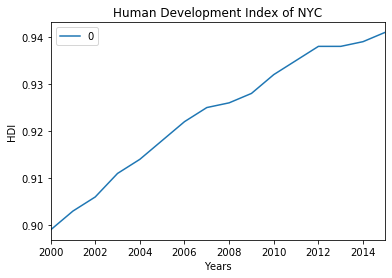

In [6]:
x_data, y_data = (hdi_nyc["year"].values, hdi_nyc["HDI"].values)
df = pd.DataFrame(y_data, index=x_data)
lines = df.plot.line()
plt.title('Human Development Index of NYC')
plt.ylabel('HDI')
plt.xlabel('Years')

plt.show()

In [27]:
sheet = client.open("hdi_trt").sheet1
trthdi_data = sheet.get_all_records()
hdi_trt = pd.DataFrame(trthdi_data)
hdi_trt.head()

,year,HDI
0,2015,0.925
1,2014,0.915
2,2013,0.911
3,2012,0.908
4,2011,0.905


In [28]:
hdi_trt.set_index('year')

,HDI
year,
2015,0.925
2014,0.915
2013,0.911
2012,0.908
2011,0.905
2010,0.902
2009,0.899
2008,0.899
2007,0.897


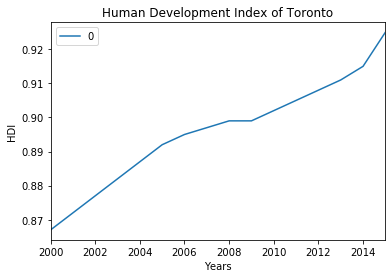

In [29]:
x_data, y_data = (hdi_trt["year"].values, hdi_trt["HDI"].values)
df = pd.DataFrame(y_data, index=x_data)
lines = df.plot.line()
plt.title('Human Development Index of Toronto')
plt.ylabel('HDI')
plt.xlabel('Years')

plt.show()

<h3>Health Care

In [4]:
sheet = client.open("health").sheet1
health_data = sheet.get_all_records()
health = pd.DataFrame(health_data)
health

,,Category Toronto,Toronto,Category NYC,"New York, NY"
0,Skill and competency of medical staff,High,75.32,High,74.56
1,Speed in completing examination and reports,High,64.32,High,68.70
2,Equipment for modern diagnosis and treatment,Very High,84.74,Very High,88.27
3,Accuracy and completeness in filling out reports,High,78.12,High,72.79
4,Friendliness and courtesy of the staff,High,75.13,High,68.01
5,Responsiveness (waitings) in medical institutions,Moderate,49.08,Moderate,53.66
6,Satisfaction with Cost to you,Very High,84.80,Moderate,42.67
7,Convenience of location for you,Very High,82.04,Very High,73.70


In [5]:
health1 = health.drop(['Category Toronto', 'Category NYC'], axis=1)
health1

,,Toronto,"New York, NY"
0,Skill and competency of medical staff,75.32,74.56
1,Speed in completing examination and reports,64.32,68.70
2,Equipment for modern diagnosis and treatment,84.74,88.27
3,Accuracy and completeness in filling out reports,78.12,72.79
4,Friendliness and courtesy of the staff,75.13,68.01
5,Responsiveness (waitings) in medical institutions,49.08,53.66
6,Satisfaction with Cost to you,84.80,42.67
7,Convenience of location for you,82.04,73.70


In [7]:
health1 = health1.set_index('')


In [8]:
health1

,Toronto,"New York, NY"
,,
Skill and competency of medical staff,75.32,74.56
Speed in completing examination and reports,64.32,68.70
Equipment for modern diagnosis and treatment,84.74,88.27
Accuracy and completeness in filling out reports,78.12,72.79
Friendliness and courtesy of the staff,75.13,68.01
Responsiveness (waitings) in medical institutions,49.08,53.66
Satisfaction with Cost to you,84.80,42.67
Convenience of location for you,82.04,73.70


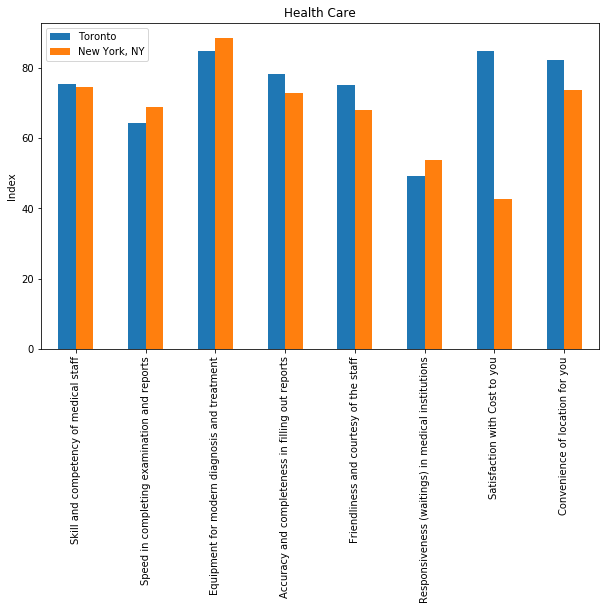

In [10]:
health1.plot( kind="bar", figsize=(10, 6))
plt.ylabel('Index')
plt.title('Health Care')
plt.show()

<h3>Cost of living data 

In [11]:
sheet = client.open("costall").sheet1
costall_data = sheet.get_all_records()
costall = pd.DataFrame(costall_data)
costall

,,"New York, NY",Toronto,Difference
0,Restaurants,(USD),(USD),Percentage
1,"Meal, Inexpensive Restaurant",21,15.03,-28.42 %
2,,,,
3,"Meal for 2 People, Mid-range Restaurant, Three...",85,60.12,-29.27 %
4,,,,
...,...,...,...,...
125,,"New York, NY",Toronto,Difference
126,Salaries And Financing,(USD),(USD),Percentage
127,Average Monthly Net Salary (After Tax),"5,281.68","2,620.89",-50.38 %
128,,,,


In [12]:
costall.drop(costall[costall['Toronto']==''].index, axis=0, inplace=True)

In [13]:
costall

,,"New York, NY",Toronto,Difference
0,Restaurants,(USD),(USD),Percentage
1,"Meal, Inexpensive Restaurant",21,15.03,-28.42 %
3,"Meal for 2 People, Mid-range Restaurant, Three...",85,60.12,-29.27 %
5,McMeal at McDonalds (or Equivalent Combo Meal),9,8.64,-3.97 %
7,Domestic Beer (0.5 liter draught),7,6.01,-14.11 %
...,...,...,...,...
123,Price per Square Meter to Buy Apartment Outsid...,"7,669.99",6159.01,-19.70%
125,,"New York, NY",Toronto,Difference
126,Salaries And Financing,(USD),(USD),Percentage
127,Average Monthly Net Salary (After Tax),"5,281.68","2,620.89",-50.38 %


<h3>Cost of living index

In [111]:
sheet = client.open("cost_index").sheet1
costindex_data = sheet.get_all_records()
cost_index = pd.DataFrame(costindex_data)
cost_index

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"New York, NY, United States",100.00,100.00,100.0,100.00,100.00,100.0
1,"Toronto, Canada",78.49,50.51,65.1,73.92,76.31,77.6


In [10]:
cost_index.set_index('City')

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
City,,,,,,
"New York, NY, United States",100.00,100.00,100.0,100.00,100.00,100.0
"Toronto, Canada",78.49,50.51,65.1,73.92,76.31,77.6


In [15]:
cost_index=cost_index.transpose()
cost_index

,0,1
City,"New York, NY, United States","Toronto, Canada"
Cost of Living Index,100,78.49
Rent Index,100,50.51
Cost of Living Plus Rent Index,100,65.1
Groceries Index,100,73.92
Restaurant Price Index,100,76.31
Local Purchasing Power Index,100,77.6


In [16]:
new_header = cost_index.iloc[0] #grab the first row for the header
cost_index = cost_index[1:] #take the data less the header row
cost_index.columns = new_header
cost_index

City,"New York, NY, United States","Toronto, Canada"
Cost of Living Index,100,78.49
Rent Index,100,50.51
Cost of Living Plus Rent Index,100,65.1
Groceries Index,100,73.92
Restaurant Price Index,100,76.31
Local Purchasing Power Index,100,77.6


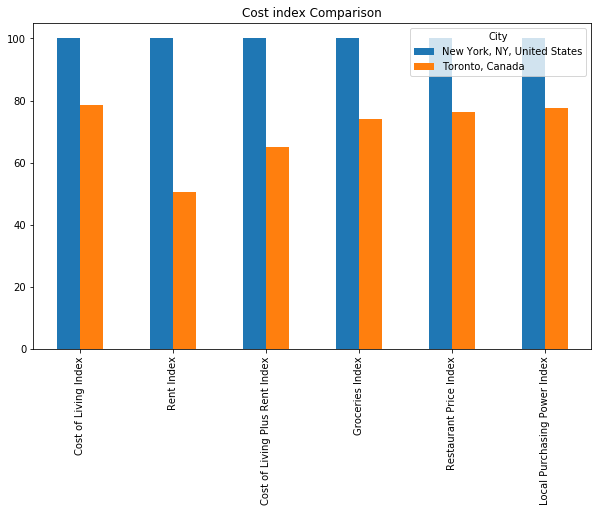

In [26]:
cost_index.plot( kind="bar", figsize=(10, 6))
plt.title('Cost index Comparison')
plt.show()

<h3>Average salary

In [63]:
sheet = client.open("avg_salary").sheet1
sal_data = sheet.get_all_records()
avg_salary = pd.DataFrame(sal_data)
avg_salary

,Salaries And Financing,"New York, NY",Toronto
0,Average Monthly Net Salary (After Tax),5281.68,2620.89


In [64]:
avg_salary = avg_salary.set_index('Salaries And Financing')
avg_salary

,"New York, NY",Toronto
Salaries And Financing,,
Average Monthly Net Salary (After Tax),5281.68,2620.89


In [65]:
avg_salary.dtypes

New York, NY    float64
Toronto         float64
dtype: object

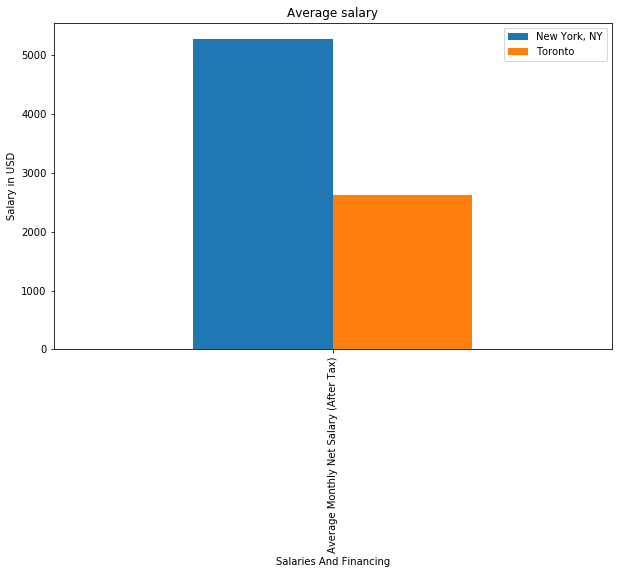

In [69]:
avg_salary.plot( kind="bar", figsize=(10, 6))
plt.ylabel('Salary in USD')
plt.title('Average salary')
plt.show()

<h3> Unemployment Data

In [78]:
sheet = client.open("unemp_rate").sheet1
unemp_data = sheet.get_all_records()
unemp_rate = pd.DataFrame(unemp_data)
unemp_rate

,Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Toronto,9.1,8.7,7.9,7.9,7.6,7.3,6.8,6.5,6.0,5.6
1,NYC,7.6,10.0,8.9,9.6,9.0,8.0,6.4,5.3,4.7,4.3


In [73]:
unemp_rate = unemp_rate.set_index('Unemployment Rate (%)')
unemp_rate

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unemployment Rate (%),,,,,,,,,,
Toronto,9.1,8.7,7.9,7.9,7.6,7.3,6.8,6.5,6.0,5.6
NYC,7.6,10.0,8.9,9.6,9.0,8.0,6.4,5.3,4.7,4.3


In [79]:
unemp_rate = unemp_rate.transpose()
unemp_rate

,0,1
Year,Toronto,NYC
2009,9.1,7.6
2010,8.7,10
2011,7.9,8.9
2012,7.9,9.6
2013,7.6,9
2014,7.3,8
2015,6.8,6.4
2016,6.5,5.3
2017,6,4.7


In [80]:
new_header = unemp_rate.iloc[0] #grab the first row for the header
unemp_rate = unemp_rate[1:] #take the data less the header row
unemp_rate.columns = new_header
unemp_rate

Year,Toronto,NYC
2009,9.1,7.6
2010,8.7,10
2011,7.9,8.9
2012,7.9,9.6
2013,7.6,9
2014,7.3,8
2015,6.8,6.4
2016,6.5,5.3
2017,6,4.7
2018,5.6,4.3


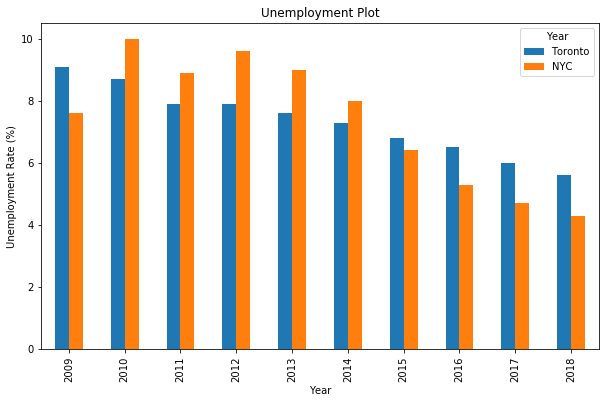

In [81]:
unemp_rate.plot( kind="bar", figsize=(10, 6))
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.title('Unemployment Plot')
plt.show()

In [120]:
sheet = client.open("weather_vs").sheet1
weather_data = sheet.get_all_records()
weather_vs = pd.DataFrame(weather_data)
weather_vs

,,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,"Toronto, Canada",-1.1,-0.2,4.6,11.3,18.5,23.5,26.4,25.3,20.7,13.8,7.4,1.8,12.7
1,"New York City, NY, USA",3.5,5.3,9.8,16.2,21.6,26.3,28.9,28.1,24.0,17.7,12.1,6.1,16.6


In [121]:
weather_vs = weather_vs.transpose()
weather_vs

,0,1
,"Toronto, Canada","New York City, NY, USA"
Jan,-1.1,3.5
Feb,-0.2,5.3
Mar,4.6,9.8
Apr,11.3,16.2
May,18.5,21.6
Jun,23.5,26.3
Jul,26.4,28.9
Aug,25.3,28.1
Sep,20.7,24


In [122]:
new_header = weather_vs.iloc[0] #grab the first row for the header
weather_vs = weather_vs[1:] #take the data less the header row
weather_vs.columns = new_header
weather_vs

,"Toronto, Canada","New York City, NY, USA"
Jan,-1.1,3.5
Feb,-0.2,5.3
Mar,4.6,9.8
Apr,11.3,16.2
May,18.5,21.6
Jun,23.5,26.3
Jul,26.4,28.9
Aug,25.3,28.1
Sep,20.7,24
Oct,13.8,17.7


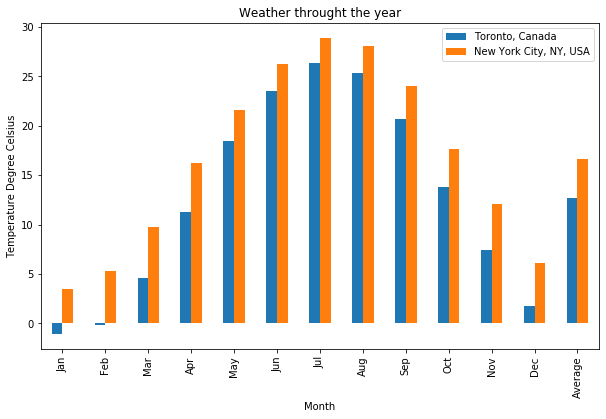

In [124]:
weather_vs.plot( kind="bar", figsize=(10, 6))
plt.ylabel('Temperature Degree Celsius')
plt.xlabel('Month')
plt.title('Weather throught the year')
plt.show()

<h3> Quality of Life Index

In [4]:
sheet = client.open("qlt_life").sheet1
qlt_life_data = sheet.get_all_records()
qlt_life = pd.DataFrame(qlt_life_data)
qlt_life

,,Category Toronto,Toronto,Category NYC,"New York, NY"
0,Purchasing Power Index,Moderate,79.12,High,100.00
1,Safety Index,High,61.14,Moderate,55.08
2,Health Care Index,High,75.37,High,65.00
3,Climate Index,High,65.35,High,79.66
4,Cost of Living Index,Moderate,76.49,High,100.00
5,Property Price to Income Ratio,High,13.55,Moderate,10.68
6,Traffic Commute Time Index,High,45.08,Moderate,43.17
7,Pollution Index,Low,38.05,Moderate,54.46
8,Quality of Life Index,High,145.04,High,141.52


In [5]:
qlt_life1 = qlt_life.drop(['Category Toronto', 'Category NYC'], axis=1)
qlt_life1

,,Toronto,"New York, NY"
0,Purchasing Power Index,79.12,100.00
1,Safety Index,61.14,55.08
2,Health Care Index,75.37,65.00
3,Climate Index,65.35,79.66
4,Cost of Living Index,76.49,100.00
5,Property Price to Income Ratio,13.55,10.68
6,Traffic Commute Time Index,45.08,43.17
7,Pollution Index,38.05,54.46
8,Quality of Life Index,145.04,141.52


In [6]:
qlt_life1 = qlt_life1.set_index('')
qlt_life1

,Toronto,"New York, NY"
,,
Purchasing Power Index,79.12,100.00
Safety Index,61.14,55.08
Health Care Index,75.37,65.00
Climate Index,65.35,79.66
Cost of Living Index,76.49,100.00
Property Price to Income Ratio,13.55,10.68
Traffic Commute Time Index,45.08,43.17
Pollution Index,38.05,54.46
Quality of Life Index,145.04,141.52


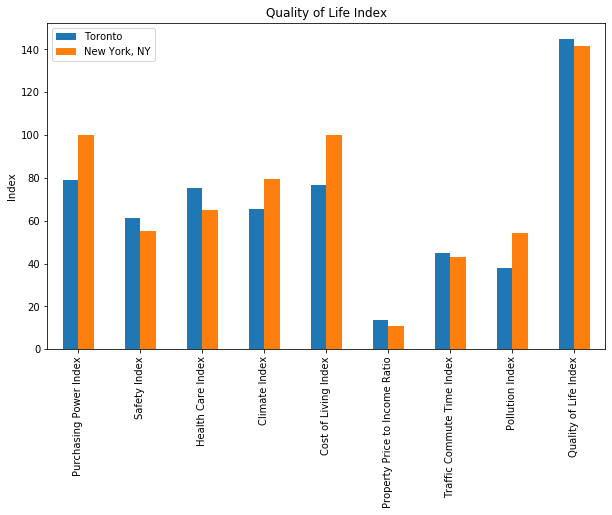

In [7]:
qlt_life1.plot( kind="bar", figsize=(10, 6))
plt.ylabel('Index')
plt.title('Quality of Life Index')
plt.show()